## Basic Operations on Images:

We can <b>load, display</b> and <b>save</b> the images with skimage library. Let us load a landscape <a href=https://helpx.adobe.com/photoshop/using/convert-color-image-black-white.html> image </a>.

(-0.5, 348.5, 143.5, -0.5)

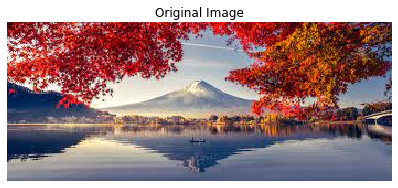

In [1]:
#import necessary libraries:
import skimage.io
import matplotlib.pyplot as plt
#Load the image into the workspace
image = skimage.io.imread(fname='land.jpg')
#Display the image
skimage.io.imshow(image)
plt.title('Original Image')
plt.axis('off')

We can also load the image as a grayscale image:

(-0.5, 348.5, 143.5, -0.5)

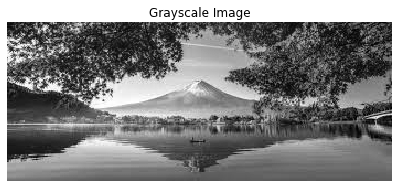

In [2]:
image_gray = skimage.io.imread(fname='land.jpg', as_gray=True)
skimage.io.imshow(image_gray)
plt.title('Grayscale Image')
plt.axis('off')

One other way is loading the colored image and then turning it into grayscale using skimage's color module:

(-0.5, 348.5, 143.5, -0.5)

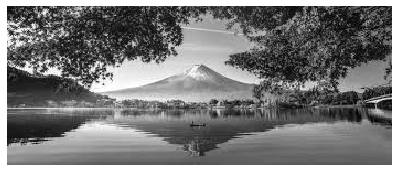

In [3]:
colored_to_gray = skimage.color.rgb2gray(image)
skimage.io.imshow(colored_to_gray)
plt.axis('off')

In [4]:
#Save the image with 'tif' extention
skimage.io.imsave(fname='land.tif', arr=image)

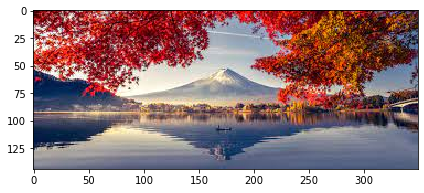

In [5]:
#Check to see if land.tif was saved
image_tif = skimage.io.imread(fname='land.tif')
skimage.io.imshow(image_tif)

## Transformations on the Images:
We can use skimage.transform module to apply functions like resize(), rotate() or rescale() to the images. 

### Resizing: 
Let us reduce the landscape image's width and height by half by using resize() function:

In [6]:
#Original image's size:
print('Original image\'s height: {}\nOriginal image\'s width: {}'.format(image.shape[0], image.shape[1]))

Original image's height: 144
Original image's width: 349


In [7]:
#We will cut the height and the width of the image by half.
output_shape=(image.shape[0]//2, image.shape[1]//2, image.shape[2])

In [8]:
from skimage import transform
resized_image = transform.resize(image=image, output_shape=output_shape)

In [9]:
#Resized image's size:
print('Resized image\'s height: {}\nResized image\'s width: {}'.format(resized_image.shape[0], resized_image.shape[1]))

Resized image's height: 72
Resized image's width: 174


In [10]:
skimage.io.imsave('resized_image.jpg', arr=resized_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


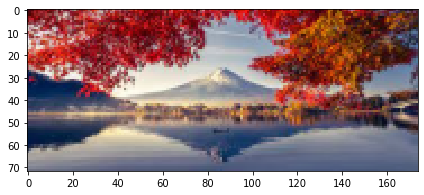

In [11]:
skimage.io.imshow(resized_image)

When we cut the image's height and width by half, we lost some data. That's why it does not look as sharp as the original image.

### Rotating:
Let us rotate the image 90 degrees clockwise and anticlockwise: 

(-0.5, 348.5, 143.5, -0.5)

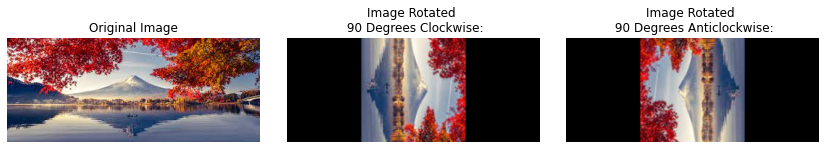

In [12]:
image_rotated_clockwise = transform.rotate(image, -90) 
image_rotated_anticlockwise = transform.rotate(image, 90)
#Display Original, Clockwise and Anticlockwise rotated images.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 10),sharex=True,sharey=True)
fig.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(image_rotated_clockwise)
ax2.set_title('Image Rotated \n 90 Degrees Clockwise:')
ax2.axis('off')
ax3.imshow(image_rotated_anticlockwise)
ax3.set_title('Image Rotated \n 90 Degrees Anticlockwise:')
ax3.axis('off')

### Rescaling:
This function scales an image by a certain factor.
We will scale down our landscape image by one-fourth:

Text(0.5, 1.0, 'Original Image Rescaled by One-Fourth\n without Anti-Aliasing')

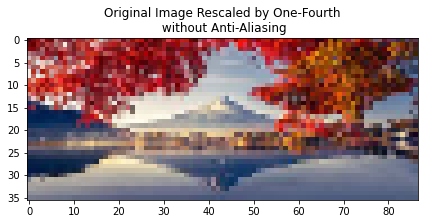

In [13]:
image_rescaled = transform.rescale(image, 1/4,anti_aliasing=False, multichannel=True )
skimage.io.imshow(image_rescaled)
plt.title('Original Image Rescaled by One-Fourth\n without Anti-Aliasing')


Text(0.5, 1.0, 'Original Image Rescaled by One-Fourth\n with Anti-Aliasing')

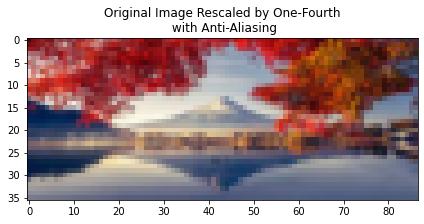

In [14]:
image_rescaled = transform.rescale(image, 1/4,anti_aliasing=True, multichannel=True )
skimage.io.imshow(image_rescaled)
plt.title('Original Image Rescaled by One-Fourth\n with Anti-Aliasing')

In [15]:
print('Original image\'s shape: {}\nRescaled image\'s shape: {}'.format(image.shape, image_rescaled.shape))

Original image's shape: (144, 349, 3)
Rescaled image's shape: (36, 87, 3)


In a digital image, aliasing is observed as rippling effect. It makes the image look like it has waves or ripples radiating from the objects. 

When we compare the images above, it looks like anti-aliasing filter prevents the poor pixelation effect of rescaling, but the trade off is sacrificing the sharpness of the image.